In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
import  numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\admin\Desktop\gd.xlsx')
pd.set_option('display.max_rows', None)
df.shape

(1141, 3)

In [3]:
fa = FactorAnalyzer(n_factors=3, rotation = 'varimax')

In [4]:
fa.fit(df)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [5]:
loadings = fa.loadings_
loadings

array([[ 1.91901323e-04,  2.95988343e-01,  0.00000000e+00],
       [-2.77891587e-01,  2.62555804e-01,  0.00000000e+00],
       [ 3.05331524e-01,  6.05971674e-03,  0.00000000e+00]])

In [6]:
ev, v = fa.get_eigenvalues()

In [7]:
xvals = range(1, df.shape[1]+1)

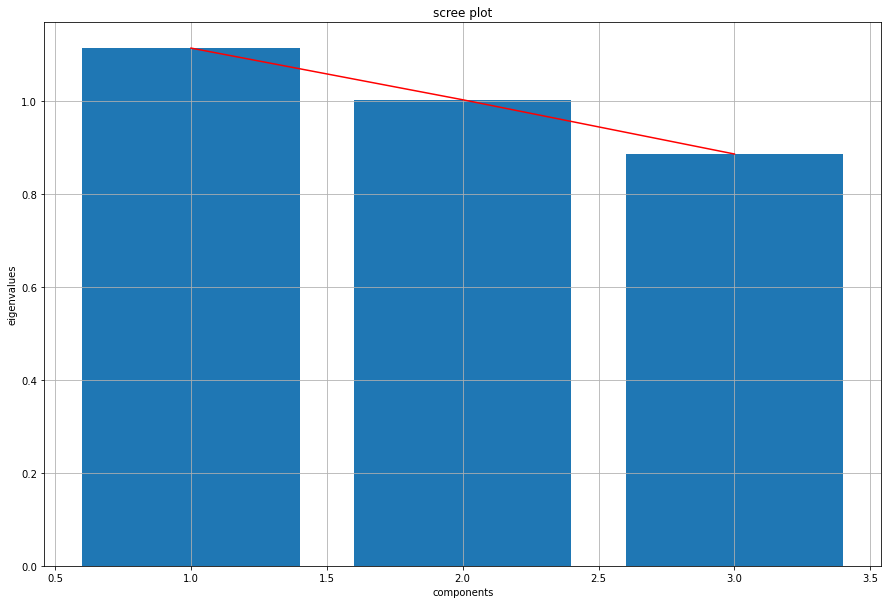

In [9]:
plt.figure(figsize = (15,10))
#for index, value in enumerate(ev):
#    plt.text(index, value, str(round(value, 2)), va = 'bottom', ha = 'center', fontsize = 15)
plt.bar(xvals, ev)
plt.plot(xvals, ev, c = 'red')
plt.xlabel('components')
plt.ylabel('eigenvalues')
plt.title('scree plot')
plt.grid()
plt.show()

In [10]:
scaler = MinMaxScaler()
x = scaler.fit_transform(df)
x

array([[0.5       , 0.33333333, 0.71029335],
       [0.5       , 0.33333333, 0.85332295],
       [0.5       , 0.33333333, 0.87497404],
       ...,
       [0.5       , 1.        , 0.91339564],
       [0.5       , 1.        , 0.91339564],
       [0.5       , 1.        , 0.91339564]])

In [11]:
pca = PCA(n_components=2)
pc = pca.fit_transform(x)
pc[:, 0]

array([0.23743299, 0.23838009, 0.23852345, ..., 0.13207213, 0.13207213,
       0.13207213])

In [13]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
per_var

array([52.5, 32.4])

In [14]:
labels = ['PC'+str(i) for i in range(1, len(per_var)+1)]
labels

['PC1', 'PC2']

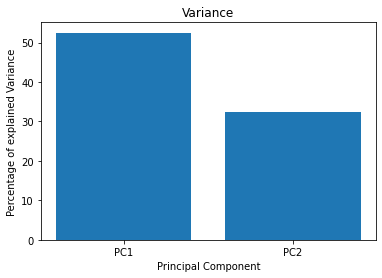

In [15]:
plt.bar(x= range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.xlabel("Principal Component")
plt.ylabel("Percentage of explained Variance")
plt.title("Variance")
plt.show()

In [16]:
dff = pd.read_excel(r'C:\Users\admin\Desktop\country.xlsx')
dff.shape

(1141, 1)

In [17]:
pca_values = pca.components_

In [18]:
columns = df.columns.values
colors = ['blue', 'red', 'green', 'black', 'purple', 'brown', 'maroon', 'olive', 'lime', 'magenta']
if len(pca_values[0]) > 6:
    colors=colors*(int(len(pca_values[0])/6)+1)

Text(0, 0.5, 'PC2 - 32.4%')

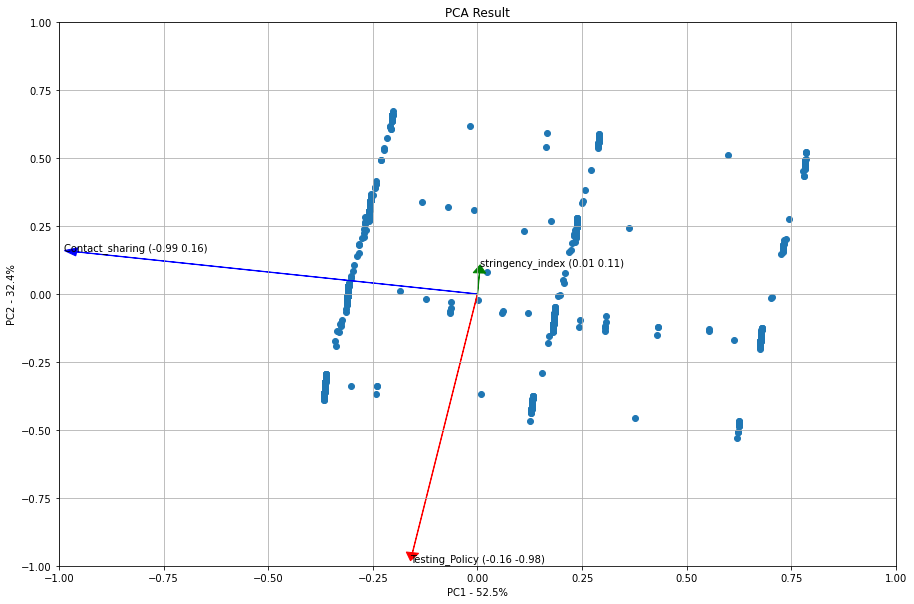

In [21]:
plt.figure(figsize = (15,10))
#for i, txt in enumerate(dff['country']):
#    plt.annotate(txt, (pc[:, 0][i], pc[:, 1][i]))
plt.scatter(pc[:, 0], pc[:, 1])

for i in range(len(pca_values[0])):
    xi=pca_values[0][i]
    yi=pca_values[1][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, 
              color=colors[i], length_includes_head=True)
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(pca_values[0, i], 
             pca_values[1, i] , 
             s=columns[i] + add_string )
plt.title("PCA Result")
plt.xlim(-1, 1)
plt.grid(True)
plt.ylim(-1, 1)
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))